In [49]:
import numpy as np 
import scipy.io as sio
import xarray as xr
import matplotlib.pyplot as plt
import netCDF4 as nc
import glob
import os
import pickle
import warnings

# Details 

read in the data from mdtfera -- which is the run from era-interim for the years 2008-2012

*note : mdtferai is the run from 1979 to 2016*

In [50]:
# Folder in which catherine has her data
composites_file = '/localdrive/drive10/mcms_tracker/RUNDIR/mdtfera/read_mdtfera/composites.pkl'

with open(composites_file, 'rb') as f:
    comp = pickle.load(f)

In [51]:
print(comp['SH']['ocean']['all'].keys())

x = comp['x']
y = comp['y']
x_edges = comp['x_edges']
y_edges = comp['y_edges']

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    # ignoring the division warnings
    
    # extracting variables to be saved
    var = 'pr'; hemis = 'NH'; lo = 'ocean'; season='warm'; 
    pr_nh_ocean_warm = comp[hemis][lo][season][var]['area_sum']/comp[hemis][lo][season][var]['area_cnt']

    var = 'prw'; hemis = 'NH'; lo = 'ocean'; season='warm'; 
    prw_nh_ocean_warm = comp[hemis][lo][season][var]['area_sum']/comp[hemis][lo][season][var]['area_cnt']

    var = 'uv10'; hemis = 'NH'; lo = 'ocean'; season='warm'; 
    uv10_nh_ocean_warm = comp[hemis][lo][season][var]['area_sum']/comp[hemis][lo][season][var]['area_cnt']

    var = 'pr'; hemis = 'SH'; lo = 'ocean'; season='warm'; 
    pr_sh_ocean_warm = comp[hemis][lo][season][var]['area_sum']/comp[hemis][lo][season][var]['area_cnt']

    var = 'prw'; hemis = 'SH'; lo = 'ocean'; season='warm'; 
    prw_sh_ocean_warm = comp[hemis][lo][season][var]['area_sum']/comp[hemis][lo][season][var]['area_cnt']

    var = 'uv10'; hemis = 'SH'; lo = 'ocean'; season='warm'; 
    uv10_sh_ocean_warm = comp[hemis][lo][season][var]['area_sum']/comp[hemis][lo][season][var]['area_cnt']


dict_keys(['pr', 'prw', 'uv10'])


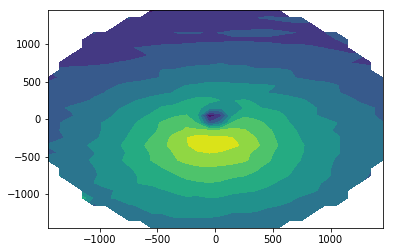

In [57]:
# plt.pcolormesh(x,y,prw_nh_ocean_warm)

plt.contourf(x,y,uv10_nh_ocean_warm, levels=10)

In [59]:
print(pr_nh_ocean_warm.shape)
print(y.shape)

(30, 30)
(30,)


In [65]:
out_file = '/localdrive/drive10/jj/mdtf/inputdata/obs_data/etc_composites/era_interim.nc'
out_ds = xr.Dataset(
    {
    'pr_nh_ocean_warm': (['x', 'y'], pr_nh_ocean_warm), 
    'prw_nh_ocean_warm': (['x', 'y'], prw_nh_ocean_warm), 
    'ws_nh_ocean_warm': (['x', 'y'], uv10_nh_ocean_warm), 
    'pr_sh_ocean_warm': (['x', 'y'], pr_sh_ocean_warm), 
    'prw_sh_ocean_warm': (['x', 'y'], prw_sh_ocean_warm), 
    'ws_sh_ocean_warm': (['x', 'y'], uv10_sh_ocean_warm), 
    },
    coords={
        'X': (['x'], x), 
        'Y': (['y'], y), 
        'X_edges': (['x_edges'], x_edges),
        'Y_edges': (['y_edges'], y_edges)
    }
)
out_ds.to_netcdf(out_file)

# variables to save from Catherine Observations
1. ds.angle
2. ds.rdist
3. ds.modiscld
4. ds.merrapw
5. ds.merraomega500

# variables to save from ERA-Interim
1. PR - total precipitation
2. PRW - total column water vapor
3. UV10 - 10 meter wind speeds (U**10 + V**10)


In [77]:
modiscld = ds.modiscld.values
merrapw = ds.merrapw.values
merraomega = ds.merraomega.values

In [86]:
out_file = '/localdrive/drive10/jj/mdtf/inputdata/obs_data/etc_composites/modis_merra.nc'
out_ds = xr.Dataset(
    {
    'modis_cld': (['x', 'y'], modiscld), 
    'merra_pw': (['x', 'y'], merrapw), 
    'merra_omega': (['x', 'y'], merraomega), 
    },
    coords={
        'X': (['x', 'y'], x), 
        'Y': (['x', 'y'], y), 
        'angle': (['x'], ang),
        'dist': (['x'], dist)
    }
)
out_ds.to_netcdf(out_file)

In [83]:
print(out_ds)

<xarray.Dataset>
Dimensions:      (x: 25, y: 25)
Coordinates:
    X            (x, y) float32 -0.0 -0.0 -0.0 ... -2078.4612 -2318.2222 -2400.0
    Y            (x, y) float32 0.0 -0.0 -0.0 ... 621.1654 -0.00020981467
    angle        (x) float32 -3.1415927 -2.8797934 ... 2.8797934 3.1415927
    dist         (x) float32 0.0 100.0 200.0 300.0 ... 2200.0 2300.0 2400.0
Dimensions without coordinates: x, y
Data variables:
    modis_cld    (x, y) float32 92.146996 91.909424 ... 67.6577 56.993305
    merra_pw     (x, y) float32 19.11767 18.964869 ... 21.494896 27.856266
    merra_omega  (x, y) float32 -3.2536764 -3.0340588 ... 0.14513089 0.30321842
